## Data Cleaning

In [1]:
import pandas as pd
data = pd.read_csv('indexProcessed.csv')

data_HSI = data[data['Index'] == 'HSI']
del data

data_HSI.drop('CloseUSD', axis=1, inplace=True)

data_HSI['Date'] = pd.to_datetime(data_HSI['Date'])
data_HSI.index = data_HSI['Date']
data_HSI.drop(['Index', 'Date', 'Adj Close'], inplace=True, axis=1)

## Draw figure

<AxesSubplot:xlabel='Date'>

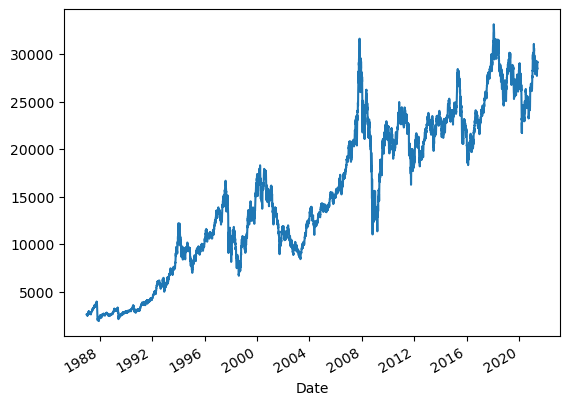

In [2]:
data_HSI["Close"].plot()

## Parameter adjustment and normalisation

In [3]:
from sklearn.preprocessing import StandardScaler
prediction_day = 1
data_HSI['Label'] = data_HSI['Close'].shift(-prediction_day)
# add extra parameters
# data_HSI.insert(value=data_HSI[['Open', 'High', 'Low', 'Close']].mean(axis=1), column='Mean', loc=0)
# data_HSI.insert(value=data_HSI[['High', 'Low']].std(axis=1), column='Std', loc=0)
# data_HSI.drop(['Open','High','Low'],axis=1,inplace=True)
data_HSI.dropna(inplace=True)

X = data_HSI.drop('Label', axis=1)

y = data_HSI['Label']
scale = StandardScaler()
scale.fit(X)
X = scale.transform(X)

## Generate training data

In [4]:
from sklearn.model_selection import train_test_split
X_pred = X[-1000:]
y_pred = y[-1000:]
X_train, X_test, y_train, y_test = train_test_split(X[:-1000], y[:-1000], test_size=0.4)

## Ridge Regression

In [6]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=0.0001, fit_intercept=True)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

# coefficients
coefficients = clf.coef_
# intercept
intercept = clf.intercept_
prediction = clf.predict(X_test)
ME = (abs(prediction - y_test.values)).mean()
R2=clf.score(X_test, y_test)
print('coefficients:', coefficients)
print('intercept:', intercept)
print('ME:', ME)
print('R2:', R2)

coefficients: [8105.69657238   16.37554051]
intercept: 15200.091069262284
ME: 144.0225387445573
R2: 0.9990144060311803


## Multiple Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

# coefficients
coefficients = model.coef_
# intercept
intercept = model.intercept_
prediction = model.predict(X_test)
ME = (abs(prediction - y_test.values)).mean()
R2=model.score(X_test, y_test)
print('coefficients:', coefficients)
print('intercept:', intercept)
print('ME:', ME)
print('R2:', R2)

coefficients: [8105.69706698   16.37519926]
intercept: 15200.09112066414
ME: 144.02251253889855
R2: 0.9990144061056525


## View forecast results

<AxesSubplot:xlabel='Date'>

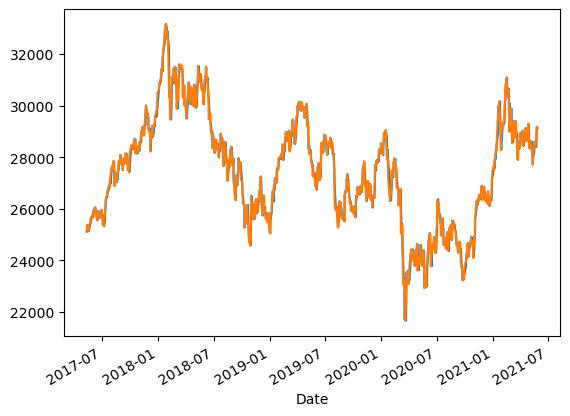

In [8]:
data_HSI1 = data_HSI[-1000:]
prediction = clf.predict(X_pred)
data_HSI1.insert(value=prediction, column='Predic', loc=0)
data_HSI1['Predic'].plot()
data_HSI1['Label'].plot()